# first things first

In [1]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image, ImageDraw, ImageFont

# Question 1

In [2]:
#Leave the answers here!

In [3]:
reshaped_text = arabic_reshaper.reshape("حامد یاجم")
bidi_text = get_display(reshaped_text)

In [4]:
font = ImageFont.truetype("arial.ttf", 100)

In [5]:
img_Q1 = Image.new('RGB', (512, 512), (0,0,0))

In [6]:
image_draw = ImageDraw.Draw(img_Q1)

In [7]:
image_draw.text((100,200), bidi_text, fill=(0,255,0), font=font)

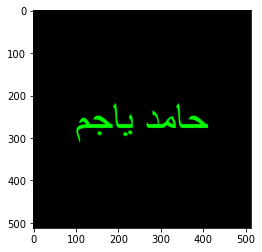

In [8]:
plt.imshow(img_Q1)
plt.show()

# Question 2

In [9]:
#Leave the answers here!

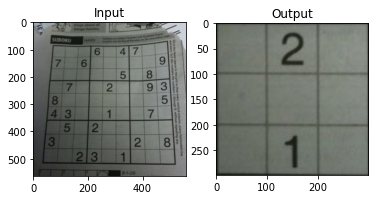

In [10]:
# Perspective Transformation
img_Q2 = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/sudoku.png?raw=true')
rows,cols,ch = img_Q2.shape
pts1 = np.float32([[207,214],[351,215],[202,359],[352,358]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img_Q2,M,(300,300))
plt.subplot(121),plt.imshow(img_Q2),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Question 3

In [11]:
#Leave the answers here!

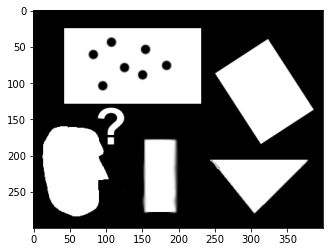

In [12]:
img_Q3 = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/pic1.png?raw=true')
img_Q3 = np.invert(img_Q3)
plt.imshow(img_Q3)

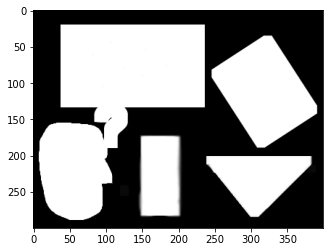

In [13]:
# Dilation
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img_Q3,kernel,iterations = 5)

plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))

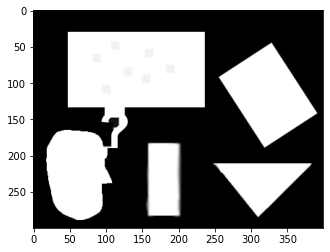

In [14]:
# Erosion
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 10)

plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))

# Question 4

In [15]:
#Leave the answers here!

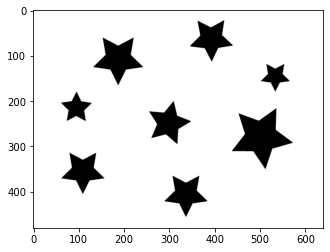

In [16]:
Stars = cv2.imread('Stars.png')
plt.imshow(Stars)
plt.show()
Stars_gray = cv2.cvtColor(Stars, cv2.COLOR_RGB2GRAY)

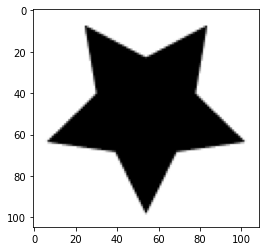

In [17]:
template2 = cv2.imread('Stars_Train.png')
plt.imshow(template2)
plt.show()
template2_gray = cv2.cvtColor(template2, cv2.COLOR_RGB2GRAY)

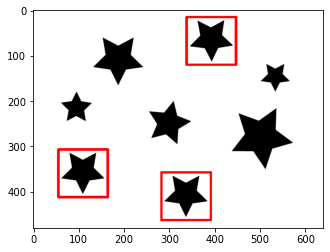

In [18]:
ch, w, h = template2.shape[::-1]
res = cv2.matchTemplate(Stars_gray,template2_gray,cv2.TM_CCOEFF_NORMED)
threshold = 0.9
loc = np.where( res >= threshold)
res = Stars.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(res, pt, (pt[0] + w, pt[1] + h), (255,0,0), 1)

plt.imshow(res)
plt.show()

## Change threshold from 0.9 to 0.5 

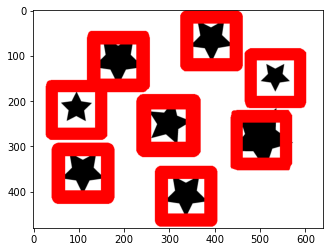

In [19]:
ch, w, h = template2.shape[::-1]
res = cv2.matchTemplate(Stars_gray,template2_gray,cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where( res >= threshold)
res = Stars.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(res, pt, (pt[0] + w, pt[1] + h), (255,0,0), 1)

plt.imshow(res)
plt.show()

## Apply another method , ( SIFT )

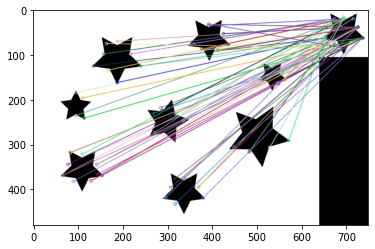

In [20]:
img1 = cv2.imread('Stars.png', cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('Stars_Train.png', cv2.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)
plt.show()

# Question 5

In [21]:
#Leave the answers here!

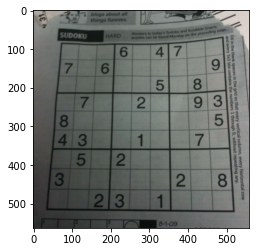

In [22]:
img_Q5 = cv2.imread(cv2.samples.findFile('sudoku.png'))
plt.imshow(img_Q5)
plt.show()

In [23]:
gray = cv2.cvtColor(img_Q5,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_Q5,(x1,y1),(x2,y2),(0,0,255),2)

In [24]:
cv2.imwrite('HL.jpg',img_Q5)

True

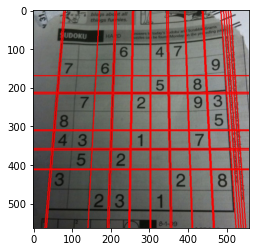

In [25]:
img_HL = io.imread('HL.jpg')
plt.imshow(img_HL)
plt.show()